## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score   
from sklearn.metrics import classification_report, confusion_matrix 

#### Gather data into dataframe and drop irrelevant columns

In [2]:
df=pd.read_csv('candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
#drop competitorname column
df.drop('competitorname',axis=1,inplace=True)
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


#### Splitting the data into train and test sets

In [4]:
# split data into train test sets
from sklearn.model_selection import train_test_split
training_set, test_set=train_test_split(df,test_size=0.2)

In [8]:
#creating data frames for training and test datasets
train_df=training_set
test_df=test_set

In [9]:
x_train=train_df.drop('chocolate',axis=1)
y_train=train_df['chocolate']
x_test=test_df.drop('chocolate',axis=1)
y_test=test_df['chocolate']

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(68, 11)
(17, 11)
(68,)
(17,)


In [11]:
y_train.value_counts()

chocolate
0    39
1    29
Name: count, dtype: int64

In [12]:
df.shape

(85, 12)

In [18]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[9 0]
 [2 6]]


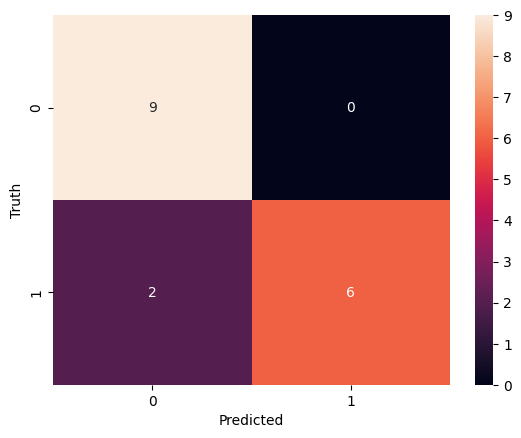

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.75      0.86         8

    accuracy                           0.88        17
   macro avg       0.91      0.88      0.88        17
weighted avg       0.90      0.88      0.88        17



In [20]:
#plot the confusion matrix using heatmap
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True) 
plt.xlabel('Predicted')
plt.ylabel('Truth') 
plt.show()
print(classification_report(y_test,y_pred))


In [21]:
# finding precision and recall, f1-score, accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Precision: 1.0
Recall: 0.75
F1-Score: 0.8571428571428571
Accuracy: 0.8823529411764706
